<a href="https://colab.research.google.com/github/min02choi/Data-Analysis-and-Applications/blob/master/Week7/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **데이터 전처리(data preprocessing)** : 머신러닝 모델에 훈련 데이터를 입력하기 전에 데이터를 가공
- 넘파이나 판다스 같은 머신러닝의 핵심 도구, 맷플롯립과 시본 같은 데이터 시각화 도구를 활용하여 실제 데이터를 정리

1. **결측치 (Missing data)**: 실제로 존재하지만 데이터베이스 등에 기록되지 않는 데이터
- 결측치 처리 전략을 세워 데이터를 채워 넣거나, 신뢰할 수 없는 경우 제거 (drop)

In [1]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- DataFrame의 **isnull 함수**를 통해 데이터 값의 NaN 여부 확인 가능

In [2]:
df.isnull()

,first_name,last_name,age,sex,preTestScore,postTestScore
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,True,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False


- sum 함수로 True인 경우 모두 더하고 전체 데이터 개수로 나누어 열별 데이터 결측치 비율을 구함

In [3]:
df.isnull().sum() / len(df)

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

- DataFrame의 **dropna** 함수는 NaN이 있는 모든 데이터의 행을 제거

In [4]:
df.dropna()

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [5]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- dropna 함수의 how 인자는 하나만 NaN이 있어도 제거를 할지 ('any'), 모두 NaN이여야 제거를 할지 ('all') 결정해줄 수 있음
- 기본값은 'any'

In [6]:
df_cleaned = df.dropna(how='all')   # 전부 다 nan이어야 행 삭제
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- 열을 삭제하고 싶을 때는 axis=1 인자를 사용

In [7]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [8]:
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- DataFrame의 **fill 함수**는 반대로 NaN인 값들을 채워주는데 사용

In [9]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [10]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


- 열별 분포를 고려하여 채울 수 있음
- 성별 postTestScore의 평균을 구합니다.

In [11]:
df.groupby("sex")[
    "postTestScore"].transform(
    "mean")

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

- 성별에 맞춰서 postTestScore의 결측치를 채워줍니다.

In [12]:
df["postTestScore"].fillna(
    df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


2. 범주형 데이터 처리하기: 원핫인코딩 (one-hot encoding)
- 범주형 데이터는 ‘A’, ‘B’, ‘C’와 같이 종류를 표시하는 데이터를 말한다. 카테고리(category) 데이터라고도 부른다. 다음과 같은 데이터는 모두 범주형 데이터의 예이다.

성별: 남자, 여자

혈액형: A, B, O, AB

이름: 홍길동, 성춘향, …

주소: 서울, 부산, 대전,

- **원핫인코딩(one-hot encoding)** : 범주형 데이터의 개수만큼 가변수(dummy variable)를 생성하여 존재 유무를 1 또는 0으로 표현

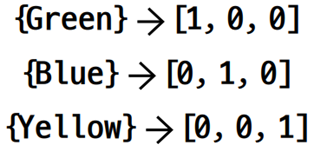

In [13]:
edges = pd.DataFrame({'source': [0, 1, 2], 'target': [2, 2, 3],
                      'weight': [3, 4, 5], 'color': ['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [14]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

- pandas의 **get_dummies 함수**는 범주형 데이터 종류 개수만큼 가변수 (dummy variable)를 생성하여 존재 유무를 1 또는 0으로 표현해줍니다.

In [15]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


- 해당 열만 따로 추출해서 생성도 가능합니다.

In [16]:
pd.get_dummies(edges["color"])

,blue,red
0,0,1
1,1,0
2,1,0


In [17]:
pd.get_dummies(edges[["color"]])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


- 필요에 따라 정수형 데이터를 범주형 데이터로 처리를 해야할 때

예제) 데이터를 각각 데이터를 M, L, XL로 변경하여 원핫인코딩을 적용

In [18]:
weight_dict = {3:"M", 4:"L", 5:"XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [19]:
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [20]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


3. 범주형 데이터로 변환하여 처리하기 : 바인딩 (binding)

- **바인딩 (binding)** : 연속형 데이터를 범주형 데이터로 변환

In [21]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


- 연속된 수를 범주형으로 나눌 때는 pandas의 **cut함수**를 이용

예제) 데이터 범위를 구분 : 0-25, 25-50, 50-75, 75-100으로 구분하여 'Low', 'Okay', 'Good', Great' 범주형 데이터 생성

In [22]:
bins = [0, 25, 50, 75, 100] # bins 정의(0-25, 25-50, 60-75, 75-100)
group_names = ['Low', 'Okay', 'Good', 'Great']

df['grade'] = pd.cut(df['postTestScore'], bins, labels=group_names)
df

,regiment,company,name,preTestScore,postTestScore,grade
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


4. 데이터의 크기 맞추기 : 스케일링 (scaling)
- **스케일링(scaling)** : 데이터 간 범위를 맞춤

예) 몸무게와 키를 하나의 모델에 넣으면 데이터의 범위가 훨씬 넓어져 키가 몸무게에 비해 모델에 과다하게 영향을 줄 수 있음

In [24]:
df = pd.DataFrame(
    {'A':[14.00, 90.20, 90.95, 96.27, 91.21],
     'B':[103.02, 107.26, 110.35, 114.23, 114.68],
     'C':['big', 'small', 'big', 'small', 'small']
    }
)

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


대표적인 정규화 방법
- **최솟값-최댓값 정규화 (min-max normalization)** : 최솟값과 최댓값을 기준으로 0에서 1, 또는 0에서 지정 값까지로 값의 크기를 변화시킴
- **z-스코어 정규화 (z-score normalization)** : 기존 값을 표준 정규분포값으로 변환하여 처리

In [25]:
df["A"] - df["A"].min()

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

**최솟값-최댓값 정규화 (min-max normalization)**

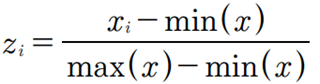

In [26]:
# 모든 값은 0과 1사이에 위치
( df["A"] - df["A"].min() ) / (df["A"].max() - df["A"].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

CF)
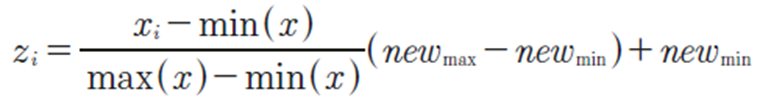

**z-스코어 정규화 (z-score normalization)**
- μ는 x 열의 평균값이고 σ는 표준편차

In [27]:
# 키의 구간을 곱해주고 키의 최솟값을 더해주기(가장 많이쓰는 정규화)
( df["B"] - df["B"].mean() ) / (df["B"].std())

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64